## Predicting a Financial Asset with the k-Nearest-Neighbors (kNN) Algorithm

#### Author: Alan Picard | mail to: picard.alan@gmail.com

This project shows how to implement the k-Nearest-Neighbors, a popular Machine Learning algorithm, to predict the direction of the price/value of a financial asset, in this case Facebook (FB) stock.

The idea behind this project is to show how the kNN algorithm could be used to predict next day movement of an asset. 
If the algorithm indicates that next day closing price will be higher (lower) than current day closing than a buy (sell) order should be implemented. 

**Disclaimer: The purpose of this article is solely informational and educational in order to provide a basic introduction on how Artiﬁcial Intelligence can be applied in ﬁnance. As with any ﬁnancial assets and trading strategies, the model and results presented in this project do not guarantee future performance. The author, hence, will not bear any responsability for the outcomes obtained if one desires to implement the model. Moreover, the strategy exhibited below does not account for trading fees.**

The first step is to retrieve historical data of the asset of interest. Many approaches are possible to obtain the historical prices of any financial asset from the web. This project will use Yahoo Finance website to get past performance of Facebook (FB) stock price. Please check the other project on my github account to learn how you can retrieve historical financial data for any currency, stock price, fixed income instrument, commodity, economic data (e.g. US GDP) and world indices.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline
from datetime import datetime
import matplotlib.pyplot as plt
from pandas_datareader import data as web # library to retrieve financial data from websites such as Yahoo Finance    

# Machine learning libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [2]:
# ticker - you can enter any stock symbol e.g. AAPL, GE, MSFT. The symbol for the S&P500 is ^GSPC.
ticker = str(input("Enter the symbol: "))

# start_date
start_date = str(input("Enter the start of the sample period (yyyy-mm-dd): "))

# end_date
end_date = str(input("Enter the end of the sample period (yyyy-mm-dd): "))

data = web.DataReader(ticker, data_source = 'yahoo', start = start_date, end  = end_date)
data

Enter the symbol: FB
Enter the start of the sample period (yyyy-mm-dd): 2015-01-01
Enter the end of the sample period (yyyy-mm-dd): 2020-01-31


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,78.930000,77.699997,78.580002,78.449997,18177500,78.449997
2015-01-05,79.250000,76.860001,77.980003,77.190002,26452200,77.190002
2015-01-06,77.589996,75.360001,77.230003,76.150002,27399300,76.150002
2015-01-07,77.360001,75.820000,76.760002,76.150002,22045300,76.150002
2015-01-08,78.230003,76.080002,76.739998,78.180000,23961000,78.180000
...,...,...,...,...,...,...
2020-01-27,216.059998,212.500000,213.100006,214.869995,13810700,214.869995
2020-01-28,218.740005,213.520004,216.139999,217.789993,13413800,217.789993
2020-01-29,224.199997,218.449997,221.440002,223.229996,33181300,223.229996


In [3]:
data = data[['Open', 'High', 'Low','Close']]
data

,Open,High,Low,Close
Date,,,,
2015-01-02,78.580002,78.930000,77.699997,78.449997
2015-01-05,77.980003,79.250000,76.860001,77.190002
2015-01-06,77.230003,77.589996,75.360001,76.150002
2015-01-07,76.760002,77.360001,75.820000,76.150002
2015-01-08,76.739998,78.230003,76.080002,78.180000
...,...,...,...,...
2020-01-27,213.100006,216.059998,212.500000,214.869995
2020-01-28,216.139999,218.740005,213.520004,217.789993
2020-01-29,221.440002,224.199997,218.449997,223.229996


In [12]:
# Predictor variables
data['Open-Close'] = data.Open - data.Close
data['High-Low']  = data.High - data.Low
data = data.dropna()
X = data[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2015-01-05,0.790001,2.389999
2015-01-06,1.080002,2.229996
2015-01-07,0.610001,1.540001
2015-01-08,-1.440002,2.150002
2015-01-09,0.459999,1.420006


In [5]:
# Target variable
y = np.where(data['Close'].shift(-1) > data['Close'], 1, -1)

In [6]:
# Splitting the dataset
split_percentage = 0.7
split = int(split_percentage*len(data))

X_train = X[:split]
y_train = y[:split]

X_test = X[split:]
y_test = y[split:]

In [10]:
# Instantiate KNN learning model(k=15)
knn = KNeighborsClassifier(n_neighbors=15)

# fit the model
knn.fit(X_train, y_train)

# Accuracy Score
accuracy_train = accuracy_score(y_train, knn.predict(X_train))
accuracy_test = accuracy_score(y_test, knn.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.60
Test_data Accuracy: 0.52


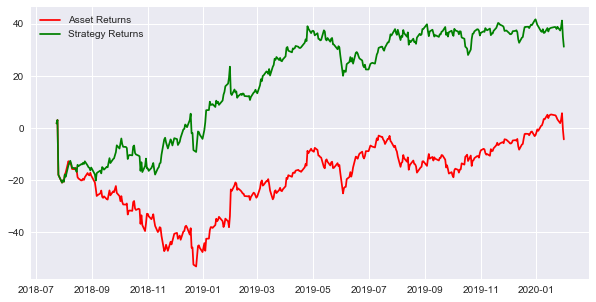

In [11]:
# Predicted Signal
data['Predicted_Signal'] = knn.predict(X)

# Asset Cumulative Returns
data['Asset_returns'] = np.log(data['Close']/data['Close'].shift(1))
Cumulative_Asset_returns = data[split:]['Asset_returns'].cumsum()*100

# Cumulative Strategy Returns 
data['Strategy_returns'] = data['Asset_returns'] * data['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = data[split:]['Strategy_returns'].cumsum()*100

# Plot the results to visualize the performance
plt.figure(figsize=(10,5))
plt.plot(Cumulative_Asset_returns, color= 'r', label = 'Asset Returns')
plt.plot(Cumulative_Strategy_returns, color= 'g', label = 'Strategy Returns')
plt.legend()
plt.show()